In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import os
import sys

import torch

from pathlib import Path
from utils.plot import *
from utils.data_loader import *

In [52]:
CT_DIR = Path("D:\data\covid\MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0\studies\CT-1")
MASK_DIR = Path("D:\data\covid\MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0\masks")

In [53]:
ds = CTSlices(CT_DIR, MASK_DIR)

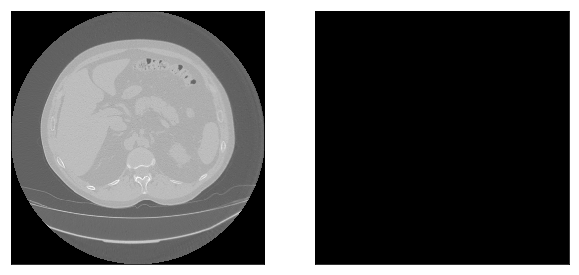

In [66]:
for i in range(len(ds)):
    x, y = ds[i]
    multiplot([x, y])
    break
    

In [6]:
def normalize(x):
    orig_mean = x.mean()
    orig_std = x.std()
    x = (x - orig_mean) / orig_std
    squash_min = x.min()
    squash_max = x.max()
    x = (x - squash_min) / (squash_max - squash_min)
    return x, squash_min, squash_max, orig_mean, orig_std

def inv_normalize(x, squash_min, squash_max, orig_mean, orig_std):
    term1 = squash_min
    term2 = (squash_max - squash_min)
    return (term1 + (term2 * x)) * orig_std + orig_mean


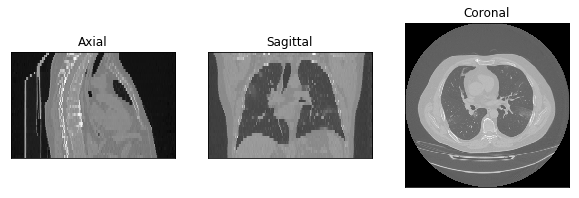

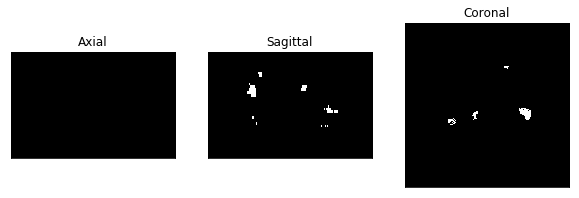

In [7]:
for ct_file, mask_file in zip(CT_DIR.iterdir(), MASK_DIR.iterdir()):
    ct_obj = nib.load(ct_file)
    zooms = ct_obj.header.get_zooms()
    k = max(zooms) / min(zooms)
    target_shape = (*ct_obj.shape[:-1], int(np.ceil(min(ct_obj.shape) * k)))
    
    ct = ct_obj.get_fdata()
    mask = nib.load(mask_file).get_fdata()
    
    ct, *inv_norm_params = normalize(ct)
    
    center_vol_plot(ct, target_shape)
    center_vol_plot(mask, target_shape)
    
    break